 <h1 align = center> Principles of Object Oriented Programming </h1>

#### 4 principles
- Encapsulation
- Abstraction
- Inheritance
- Polymorphism


## 1 ENCAPSULATION

In encapsulation, the variables of a class can be made hidden from other classes, and can be accessed only through the methods of their current class. Therefore, it is also known as data hiding.
<br><br>
Encapsulation can be described as a protective barrier that prevents the code and data being randomly accessed by other code defined outside the class. Access to the data and code is tightly controlled by a class.

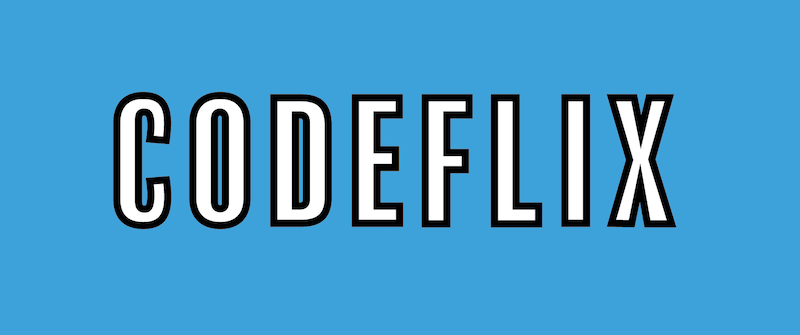

In [3]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'

display(Image(generic_image))

In [9]:
class Video:
    def __init__ (self):
        self.title = ""
        self.length = timedelta()
        self.link = generic_image
        
    def play(self):
        print(f"Now Playing {self.title}")
        display(Image(self.link))
                
    def pause(self):
        print("Video Paused")
                
    def __repr__(Self):
        return f"{self.title} is {self.length.seconds} seconds long"        
        

Now Playing Cool Video


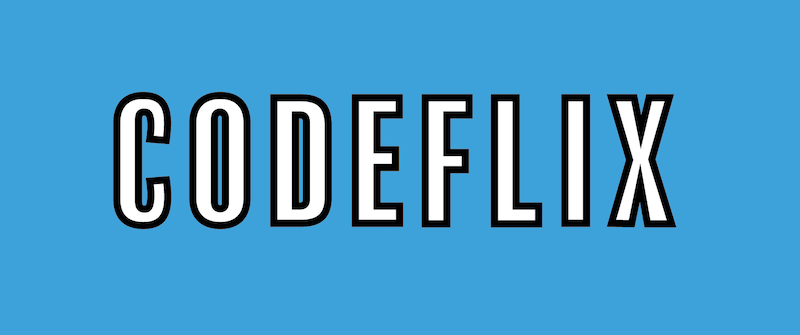

In [7]:
vid = Video()
vid.title = "Cool Video"

vid.play()

## 2 ABSTRACTION

Abstraction is a process of hiding the implementation details from the user, only the functionality will be provided to the user.
<br><br>


In [8]:
class Movie(Video):
    def __inint__(self):
        super().__init__(self)
        
example = Movie()
print(example.title)

class Commercial(Video):
    
    def pause(self):
        return "This action is unavailable"

In [29]:
class Episode(Video):
    def __init__(self, data):
        Video.__init__(self)
        self.number = data["number"]
        self.season = data["season"]
        self.date_aired = data["airdate"]
        self.summary = data["summary"]
        self.rating = data["rating"]["average"]
        self.length = timedelta(minutes = data["runtime"])
        self.title = data["name"]
        if data["image"]:
            self.link = data["image"]["medium"]
        

## 3 INHERITENCE

Inheritance can be defined as the process where one class acquires the properties (methods and fields) of another.
<br>
<i>(see above)</i>

In [64]:
class Series:
    def __init__(self):
        self.id = None
        self.network = None
        self.summary = None
        self.genres = []
        self.episodes = []
        self.see_show_cast = []
    
    def get_info(self, query=""):
        data = None
        while not data:
            if not query:
                query = input("What is the name of the series? ")
            r = requests.get(f"https://api.tvmaze.com/singlesearch/shows?q={query}")
            if r.status_code == 200:
                data = r.json()
            else:
                print(f"Series Error: status code {r.status_code}")
                query = ""
                
        #use data to fill attributes
        self.id = data["id"]
        self.title = data["name"]
        self.genres = data["genres"]
        self.summary = data["summary"]
        
        if data["network"]:
            self.network = data["network"]["name"]
        else:
            self.network = data["webChannel"]["name"]
        #API call for episodes
        r = requests.get(f"https://api.tvmaze.com/shows/{self.id}/episodes")
        if r.status_code == 200:
            episodes = r.json()
        else:
            print(f"Episode Error: status code {r.status_code}")
            return
        
        self.seasons = episodes[-1]["season"]
        self.episodes = [Episode(ep) for ep in episodes]
        print(f"{self.title} has {len(self.episodes)} episodes")
        
         #API call for cast
        r = requests.get(f"https://api.tvmaze.com/shows/{self.id}/cast")
        if r.status_code == 200:
            self.see_show_cast = r.json()
        else:
            print(f"Episode Error: status code {r.status_code}")
            return
        
    #Display cast function
    def display_cast(self):
        for i in range(len(self.see_show_cast)):
            display(Image(self.see_show_cast[i]["person"]["image"]["medium"]))
            print(f'\n\n {self.see_show_cast[i]["character"]["name"]} - {self.see_show_cast[i]["person"]["name"]}\n\n')
        
    def play(self):
        for i in range(len(self.episodes)):
            if i > 0 and i % 3 == 0:
                watching = input("Are you still watching? (Y/N)")
                if watching.lower().strip() not in ("yes", "y"):
                    break
            self.episodes[i].play()
            sleep(self.episodes[i].length.seconds/1000)
    
    def __len__(self):
        return len(self.episodes)
    
    def __repr__(self):
        return f"Titl: {self.title}"

In [65]:
first_show = Series()
first_show.get_info()

What is the name of the series? stranger things
Stranger Things has 34 episodes


In [59]:
first_show.play()



 Joyce Byers - Winona Ryder




 Lucas Sinclair - Caleb McLaughlin




 Mike Wheeler - Finn Wolfhard




 Dustin Henderson - Gaten Matarazzo




 Nancy Wheeler - Natalia Dyer




 Chief Jim Hopper - David Harbour




 Steve Harrington - Joe Keery




 Jonathan Byers - Charlie Heaton




 Jane "Eleven" Ives - Millie Bobby Brown




 Will Byers - Noah Schnapp




 Karen Wheeler - Cara Buono




 Maxine "Max" Mayfield - Sadie Sink




 Billy Hargrove - Dacre Montgomery




 Erica Sinclair - Priah Ferguson




 Dr. Martin Brenner - Matthew Modine




 Murray Bauman - Brett Gelman




 Robin - Maya Thurman-Hawke




 Dr. Sam Owens - Paul Reiser




 Bob Newby - Sean Astin




## 4 POLYMORPHISM

In object-oriented programming, polymorphism (from the Greek meaning “having multiple forms”) is the characteristic of being able to assign a different meaning or usage to something in different contexts — specifically, to allow an entity such as a function, or an object to have more than one form.
<br><br>


In [33]:
len(first_show)

26

In [62]:
class Theater:
    def __init__(self):
        self.users = []
        self.watch_list = []
        self.current_user = None
        
    
    # add_user 
    def add_user(self, name=''):
        if not name:
            name = input('What is the name of your new user? ')
        self.users.append(name)
        self.choose_user()
            
    # choose_user
    def choose_user(self):
        while True:
            print('Users:')
            for user in self.users:
                print(user)
            current = input('Choose a user: ')
            if current in self.users:
                self.current_user = current
                break
            else:
                print(f"{current} is not a user.")
            
    # add_to_watch_list
    def add_to_watch_list(self, query=""):
        show = Series()
        show.get_info(query)
        self.watch_list.append(show)
        print(f"{show.title} has been added to the watchlist")
    
    # choose_from_watch_list
    def choose_from_watch_list(self):
        for series in self.watch_list:
            print(f"\n\n{series} | Episodes: {len(series)}")
            print(f"\nSummary: \n{series.summary}")
            display(Image(series.episodes[0].link))
            
        watch = input('What do you want to watch? ')
        
        if watch.lower() in list(map( lambda x: x.title.lower(), self.watch_list)):
            for series in self.watch_list:
                if series.title.lower() == watch.lower().strip():
                    series.play()
        else:   
            response = input(f'{watch} is not in your watch list. Would you like to add it? y/N')
            if response in ('yes','y'):
                self.add_to_watch_list(watch)
                self.watch_list[-1].play()
    
    # Show the cast in shows in watch list
    def see_show_cast(self):
        for series in self.watch_list:
            print(f"\n\n{series}")
        
        cast = input("Which show would you like to view the cast of?")
        
        if cast.lower() in list(map( lambda x: x.title.lower(), self.watch_list)):
            for series in self.watch_list:
                if series.title.lower() == cast.lower().strip():
                      series.display_cast()
                else:
                    print("Sorry, the series you selected is not on your watch list.")
        
        
            
    
    # /shows/:id/cast
    # run 
    def run(self):
        """
            Method allowing users to choose a series and play episodes.
        """
        display(Image(generic_image))
        
        if self.users:
            self.choose_user()
        else:
            name = input('Create a profile: ')
            self.add_user(name)
            self.current_user = name
        print(self.current_user)
        print("""
            What would you like to do?
            
            Search - Search for shows
            Watch  - Pick something from your watch list
            Cast   - Show the cast from a show in your watch list
            Add    - Add a new user
            Quit   - Close the app
        """)
        
        while True:
            response = input('What would you like to do ( search, watch, cast, add, quit)')
            
            if response.lower() == "search":
                self.add_to_watch_list()
            elif response.lower() == "watch":
                self.choose_from_watch_list()
            elif response.lower() == "cast":
                  self.see_show_cast()
            elif response.lower() == "add":
                self.add_user()
            elif response.lower() == "quit":
                print(f"Thanks for watching {self.current_user}.")
                break
            else:
                print('Incorrect input... Try again.')

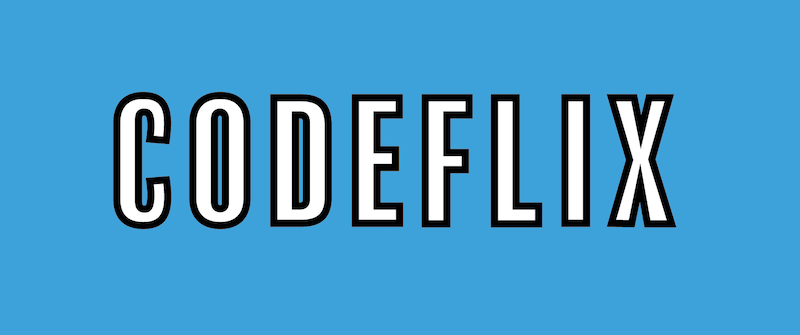

Create a profile: boi
Users:
boi
Choose a user: boi
boi

            What would you like to do?
            
            Search - Search for shows
            Watch  - Pick something from your watch list
            Cast   - Show the cast from a show in your watch list
            Add    - Add a new user
            Quit   - Close the app
        
What would you like to do ( search, watch, cast, add, quit)search
What is the name of the series? jojo's bizarre adventure
JoJo's Bizarre Adventure has 164 episodes
JoJo's Bizarre Adventure has been added to the watchlist
What would you like to do ( search, watch, cast, add, quit)cast


Titl: JoJo's Bizarre Adventure
Which show would you like to view the cast of?jojo's bizarre adventure


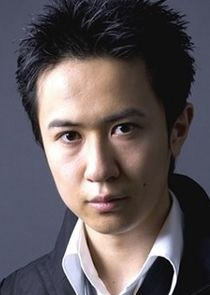



 Joseph Joestar - Tomokazu Sugita




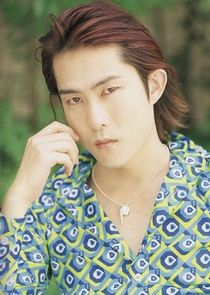



 Dio Brando - Takehito Koyasu




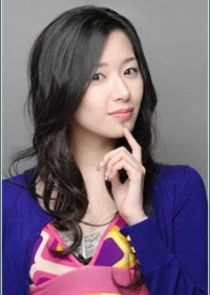



 Lisa Lisa - Atsuko Tanaka




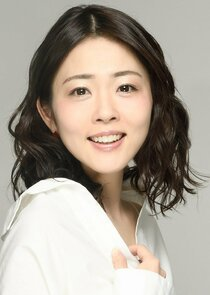



 Iggy - Misato Fukuen




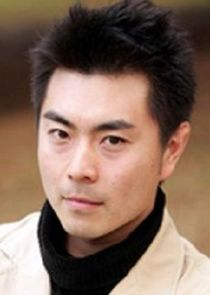



 Jean-Pierre Polnareff - Fuminori Komatsu




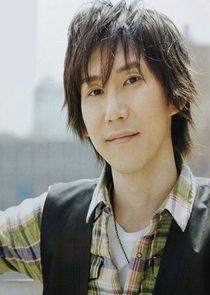



 Noriaki Kakyoin - Daisuke Hirakawa




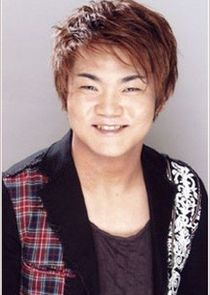



 Mohammed Avdol - Kenta Miyake




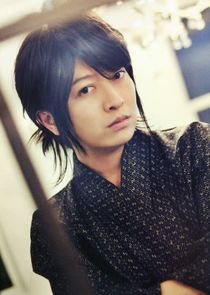



 Jotaro Kujo - Daisuke Ono




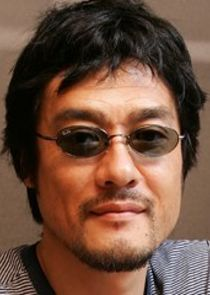



 Esidisi - Keiji Fujiwara




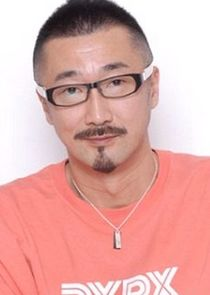



 Wamuu - Akio Ohtsuka




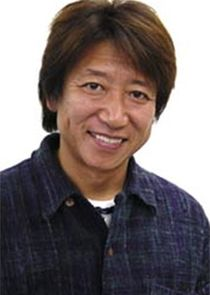



 Kars - Kazuhiko Inoue




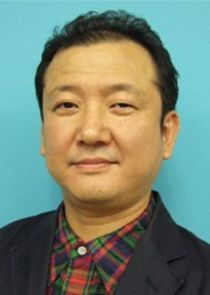



 Will A. Zeppeli - Yoku Shioya




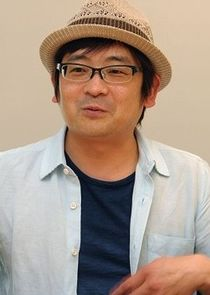



 Speedwagon - Youji Ueda




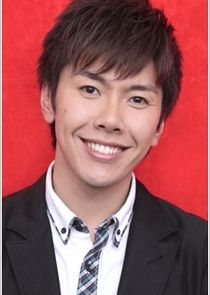



 Caesar Anthonio Zeppeli - Takuya Satō




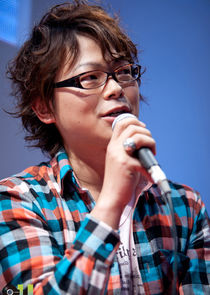



 Jonathan Joestar - Kazuyuki Okitsu


What would you like to do ( search, watch, cast, add, quit)quit
Thanks for watching boi.


In [66]:
codeflix = Theater()
codeflix.run()

##  Exercise 1:
Discuss what other classes, methods, or fields (attributes) we could make to improve our streaming service using these principles. <br> <br>
Start making a few of them and see where it leads...